In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import DataLoader
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tqdm.notebook import tqdm
from sklearn.datasets import load_iris
import time


# **Generate Dataset**

In [ ]:
# data, labels = make_blobs(n_samples = 1000,
#            centers = 4,
#            n_features = 2,
#            random_state = 0)
# data.shape,labels.shape

iris = load_iris()
#print(iris.DESCR)
data = iris.data
labels = iris.target
data.shape,labels.shape

((150, 4), (150,))

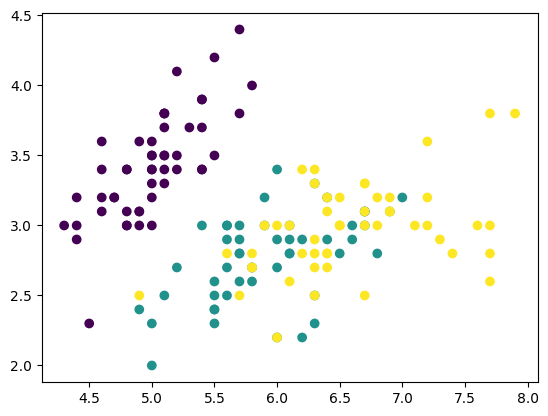

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels)

In [ ]:
#train-test split
X_train,X_val,Y_train,Y_val = train_test_split(data,labels, stratify = labels,
                                               test_size=0.2,
                                               random_state=0)
X_train,X_val,Y_train,Y_val = map(torch.tensor,(X_train,X_val,Y_train,Y_val))

# Convert to float32
X_train = X_train.type(torch.float32)
X_val = X_val.type(torch.float32)
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

(torch.Size([120, 4]),
 torch.Size([30, 4]),
 torch.Size([120]),
 torch.Size([30]))

In [ ]:
## Fitting a model
print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    .. note::
        As per the example above, an ``__init__()`` call to the parent class
        must be made before assignment on the child.

    :ivar training: Boolean represents whether this module is in training or
         

In [ ]:
def accuracy(y_hat,y):
  pred = torch.argmax(y_hat,dim=1)
  return (pred==y).float().mean()

In [ ]:
class FirstNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    # Change the input features of lin1 to 4 to match X_train
    self.lin1 = nn.Linear(4, 2)
    self.lin2 = nn.Linear(2, 3)

  def forward(self,x):
    a1 = self.lin1(x)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return a2

In [ ]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []

  opt = SGD(fn.parameters(),lr=learning_rate)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat,Y_train)
    loss_arr.append(loss.item())
    acc = accuracy(y_hat,Y_train)
    acc_arr.append(acc.item())
    loss.backward()
    opt.step()
    opt.zero_grad()

  plt.plot(loss_arr,"r")
  plt.plot(acc_arr,"g")
  plt.legend(['loss','accuracy'])
  plt.show()

  # Print the final accuracy
  print(f"Final Accuracy: {acc_arr[-1]}")

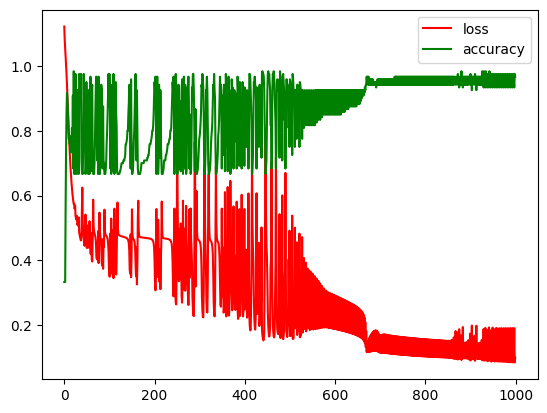

Final Accuracy: 0.9666666388511658


In [ ]:
fn = FirstNetwork()
fit()

In [ ]:
fn.parameters()

<generator object Module.parameters at 0x78340ecadcb0>

In [ ]:
class FirstNetwork_Seq(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    # Its implimated in side
    self.net = nn.Sequential(
        nn.Linear(4,2),
        nn.Sigmoid(),
        nn.Linear(2,3),
        nn.Softmax()
    )

  def forward(self,x):
    #x = x.float()
    return self.net(x)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


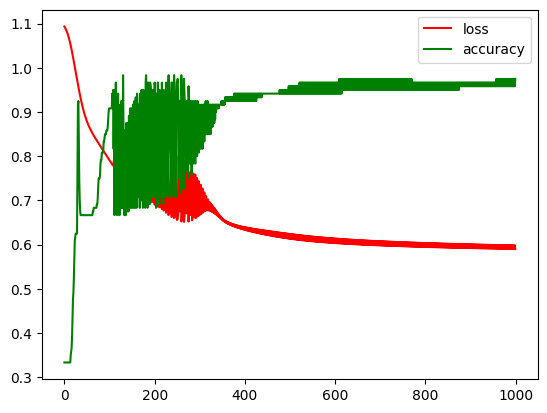

Final Accuracy: 0.9750000238418579


In [ ]:
fn = FirstNetwork_Seq()
fit()